In [1]:
# Logistic Regression on Breast Cancer Wisconsin (Diagnostic) Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve

In [2]:
# Load Dataset
data = pd.read_csv('D:/SLIIT/Y4_S2/ML/Assigment/Brest-Cancer-Dataset.csv') # D:/SLIIT/Y4_S2/ML/Assigment/archive (1)/data.csv

In [3]:
# Drop unnamed column if present
data = data.drop(columns=['id', 'Unnamed: 32'], errors='ignore')

In [4]:
# Convert diagnosis to binary
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

In [5]:
# Split features and labels
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

In [6]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [8]:
# Train Logistic Regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [9]:
# Predict
y_pred = model.predict(X_test)

In [10]:
# Evaluation Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.956140350877193
Confusion Matrix:
 [[212   5]
 [ 10 115]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       217
           1       0.96      0.92      0.94       125

    accuracy                           0.96       342
   macro avg       0.96      0.95      0.95       342
weighted avg       0.96      0.96      0.96       342



In [11]:
# ROC-AUC
y_probs = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_probs)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.9640552995391705


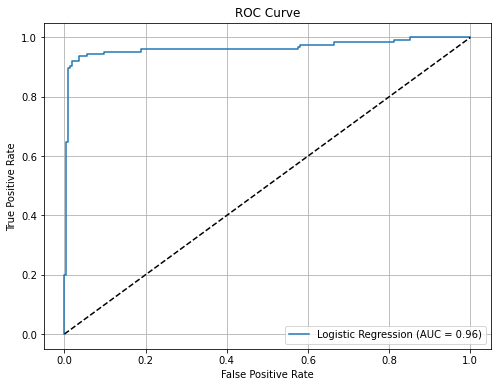

In [12]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()